# 📦 Import Required Libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# 📥 Load Datasets

In [7]:
customers_df = pd.read_csv('Data/dim_customers.csv')
calendar_df = pd.read_csv('Data/dim_dates.csv')
products_df = pd.read_csv('Data/dim_products.csv')
sales_df = pd.read_csv('Data/fact_sales.csv')


## 🔍 Initial Inspection of Sales Data

In [16]:
sales_df


,SaleID,DateID,CustomerID,ProductID,Quantity,UnitPrice,Discount,SalesAmount
0,1,20230413,1007.0,202,4.0,699,0.10,2516.40
1,2,20231215,1002.0,205,4.0,599,0.07,2228.28
2,3,20230928,1001.0,208,3.0,399,NaN,1053.36
3,4,20230417,1004.0,208,2.0,399,0.03,774.06
4,5,20230313,1008.0,203,4.0,1299,0.08,4780.32
...,...,...,...,...,...,...,...,...
495,496,20231121,1001.0,209,2.0,149,0.10,268.20
496,497,20230104,1009.0,208,4.0,399,0.17,1324.68
497,498,20230116,1001.0,209,1.0,149,0.15,126.65
498,499,20231007,1001.0,205,3.0,599,0.11,1599.33


## 🗓 Adding Date Column from Calendar Table

In [19]:
# Mapping 'DateID' to actual dates from calendar_df
sales_df['Date'] = sales_df['DateID'].map(calendar_df.set_index('DateID')['Date'])


## 🔄 Reorder Columns for Better Readability

In [33]:
sales_df.columns.to_list()

# Reordering columns to place 'Date' next to 'DateID'
new_order = ['SaleID', 'DateID', 'Date', 'CustomerID', 'ProductID', 'Quantity', 'UnitPrice', 'Discount', 'SalesAmount']
sales_df = sales_df[new_order]


In [35]:
sales_df

,SaleID,DateID,Date,CustomerID,ProductID,Quantity,UnitPrice,Discount,SalesAmount
0,1,20230413,2023-04-13,1007.0,202,4.0,699,0.10,2516.40
1,2,20231215,2023-12-15,1002.0,205,4.0,599,0.07,2228.28
2,3,20230928,2023-09-28,1001.0,208,3.0,399,NaN,1053.36
3,4,20230417,2023-04-17,1004.0,208,2.0,399,0.03,774.06
4,5,20230313,2023-03-13,1008.0,203,4.0,1299,0.08,4780.32
...,...,...,...,...,...,...,...,...,...
495,496,20231121,2023-11-21,1001.0,209,2.0,149,0.10,268.20
496,497,20230104,2023-01-04,1009.0,208,4.0,399,0.17,1324.68
497,498,20230116,2023-01-16,1001.0,209,1.0,149,0.15,126.65
498,499,20231007,2023-10-07,1001.0,205,3.0,599,0.11,1599.33


## 🧾 Check and Convert Data Types

In [44]:
sales_df.dtypes

SaleID                  int64
DateID                  int64
Date           datetime64[ns]
CustomerID            float64
ProductID               int64
Quantity              float64
UnitPrice               int64
Discount              float64
SalesAmount           float64
dtype: object

In [42]:
# Converting 'Date' column to datetime format
sales_df['Date'] = pd.to_datetime(sales_df['Date'])


## ❗ Check for Missing Values

In [47]:
# Identifying missing values
missing_values = sales_df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values


CustomerID    3
Quantity      3
Discount      4
dtype: int64

## 🔎 Displaying Rows with Missing Values

In [60]:
# Filtering rows with any missing value
sales_df[sales_df.isna().any(axis = 1)]


,SaleID,DateID,Date,CustomerID,ProductID,Quantity,UnitPrice,Discount,SalesAmount
2,3,20230928,2023-09-28,1001.0,208,3.0,399,NaN,1053.36
18,19,20230915,2023-09-15,NaN,204,1.0,999,0.17,829.17
110,111,20230515,2023-05-15,1006.0,201,NaN,799,0.14,2748.56
183,184,20231114,2023-11-14,NaN,203,3.0,1299,0.07,3624.21
185,186,20230813,2023-08-13,1005.0,208,3.0,399,NaN,1005.48
190,191,20231111,2023-11-11,1003.0,204,NaN,999,0.02,3916.08
280,281,20230426,2023-04-26,1010.0,202,2.0,699,NaN,1314.12
294,295,20230612,2023-06-12,NaN,203,2.0,1299,0.18,2130.36
363,364,20231208,2023-12-08,1010.0,206,3.0,349,NaN,869.01
412,413,20230222,2023-02-22,1004.0,208,NaN,399,0.10,1436.40


## 🧹 Strategy to Handle Missing Values

In [66]:
# Dropping rows with missing Quantity or CustomerID
sales_df = sales_df.dropna(subset = ['CustomerID', 'Quantity'])

# Recheck for any remaining missing values
sales_df[sales_df.isna().any(axis = 1)]


,SaleID,DateID,Date,CustomerID,ProductID,Quantity,UnitPrice,Discount,SalesAmount


In [68]:
# Filling missing Discount values with 0, assuming no discount was offered
sales_df = sales_df.copy()
sales_df['Discount'] = sales_df['Discount'].fillna(0)

# Final check for missing values
sales_df[sales_df.isna().any(axis = 1)]


,SaleID,DateID,Date,CustomerID,ProductID,Quantity,UnitPrice,Discount,SalesAmount


# 🔗 Merge All Dimensional Tables to Create Final Dataset

In [71]:
# Merging all dimension tables with the fact_sales data
df = (
    sales_df.merge(customers_df, on='CustomerID', how='left')
            .merge(products_df, on='ProductID', how='left')
            .merge(calendar_df, on='DateID', how='left')
)


## 🧼 Clean Up Column Names

In [75]:
# Renaming and dropping duplicate or unnecessary columns
df.rename(columns={'Date_x': 'Date'}, inplace=True)
df.drop(columns=['DateID', 'Date_y'], inplace=True)
df.rename(columns={'UnitPrice_x': 'UnitPrice'}, inplace=True)
df.drop(columns=['UnitPrice_y'], inplace=True)

df.head()


,SaleID,Date,CustomerID,ProductID,Quantity,UnitPrice,Discount,SalesAmount,CustomerName,Age,Gender,Region,ProductName,Category,Year,Month,Day,Quarter
0,1,2023-04-13,1007.0,202,4.0,699,0.10,2516.40,George White,61,Male,East,Samsung Galaxy S21,Smartphones,2023,4,13,2
1,2,2023-12-15,1002.0,205,4.0,599,0.07,2228.28,Bob Smith,34,Male,South,iPad Air,Tablets,2023,12,15,4
2,3,2023-09-28,1001.0,208,3.0,399,0.00,1053.36,Alice Johnson,25,Female,North,Apple Watch,Wearables,2023,9,28,3
3,4,2023-04-17,1004.0,208,2.0,399,0.03,774.06,Diana Cruz,23,Female,West,Apple Watch,Wearables,2023,4,17,2
4,5,2023-03-13,1008.0,203,4.0,1299,0.08,4780.32,Hannah Kim,29,Female,West,MacBook Pro,Laptops,2023,3,13,1


# 📊 Calculate Important KPIs

In [91]:
# Calculating key metrics
total_revenue = df['SalesAmount'].sum()
total_qty = df['Quantity'].sum()
total_orders = df['SaleID'].nunique()
avg_discount_offered = df['Discount'].mean()

metrics_title = 'Important KPIs'

print('-'*50)
print(f"\033[1m{metrics_title: ^50}\033[0m")
print('-'*50)

print(f"Total Revenue            : \033[1m${total_revenue :,.2f}\033[0m")
print(f"Total Quantity Ordered   : \033[1m{total_qty :,.2f}\033[0m")
print(f"Total Orders             : \033[1m{total_orders :,.2f}\033[0m")
print(f"Average Discount Offered : \033[1m{avg_discount_offered:,.2f}\033[0m")

print('='*50)


--------------------------------------------------
                  Important KPIs                  
--------------------------------------------------
Total Revenue            : $635,643.66
Total Quantity Ordered   : 1,250.00
Total Orders             : 494.00
Average Discount Offered : 0.10


# 📈 Product Performance Metrics

In [95]:
# Top 5 products by revenue
top_products = df.groupby('ProductName')['SalesAmount'].sum().sort_values(ascending = False).head(5)

# Most sold product categories by quantity
most_sold_categories = df.groupby('Category')['Quantity'].sum()

# Products with highest average discount rate
products_with_highest_disc_rate = df.groupby('ProductName')['Discount'].mean().round(2)


# 👥 Customer Behavior Insights

In [98]:
# Creating age groups using bins
bins = [0, 12, 19, 59, 99]
labels = ['Child', 'Teen', 'Adult', 'Senior Citizen']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Revenue distribution by age group
custom_colors = ['#b6ad90','#7f4f24']
revenue_by_age_group = df.groupby('Age Group', observed=True)['SalesAmount'].sum()

# Revenue distribution by gender
revenue_by_gender = df.groupby('Gender')['SalesAmount'].sum()

# Revenue distribution by region
custom_colors = ['#7f4f24', '#936639', '#a68a64', '#b6ad90']
revenue_by_region = df.groupby('Region')['SalesAmount'].sum()


# 📆 Sales Trend Analysis

In [106]:
# Creating Year-Month column for trend analysis
df['YearMonth'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Monthly revenue trend
monthly_revenue = df.groupby('YearMonth')['SalesAmount'].sum().reset_index()

# Monthly quantity trend
monthly_qty_trend = df.groupby('YearMonth')['Quantity'].sum().reset_index()


## 🌸 Seasonal Sales Pattern by Category

In [109]:
# Sales performance across months and categories
seasonal_spikes_in_categories = df.groupby(['Category', 'YearMonth'])['SalesAmount'].sum().reset_index()

# Selecting top 3 categories by sales amount
top_categories = df.groupby('Category')['SalesAmount'].sum().nlargest(3).index

# Custom color palette for plotting
custom_palettes = {
    'Headphones': '#7f4f24',
    'Laptops': '#a68a64',
    'Smartphones': '#c2c5aa'
}

# Filtering data for top categories
filtered_data = seasonal_spikes_in_categories[seasonal_spikes_in_categories['Category'].isin(top_categories)]


# 📊 Report 1: Product Performance & Customer Behavior Insights

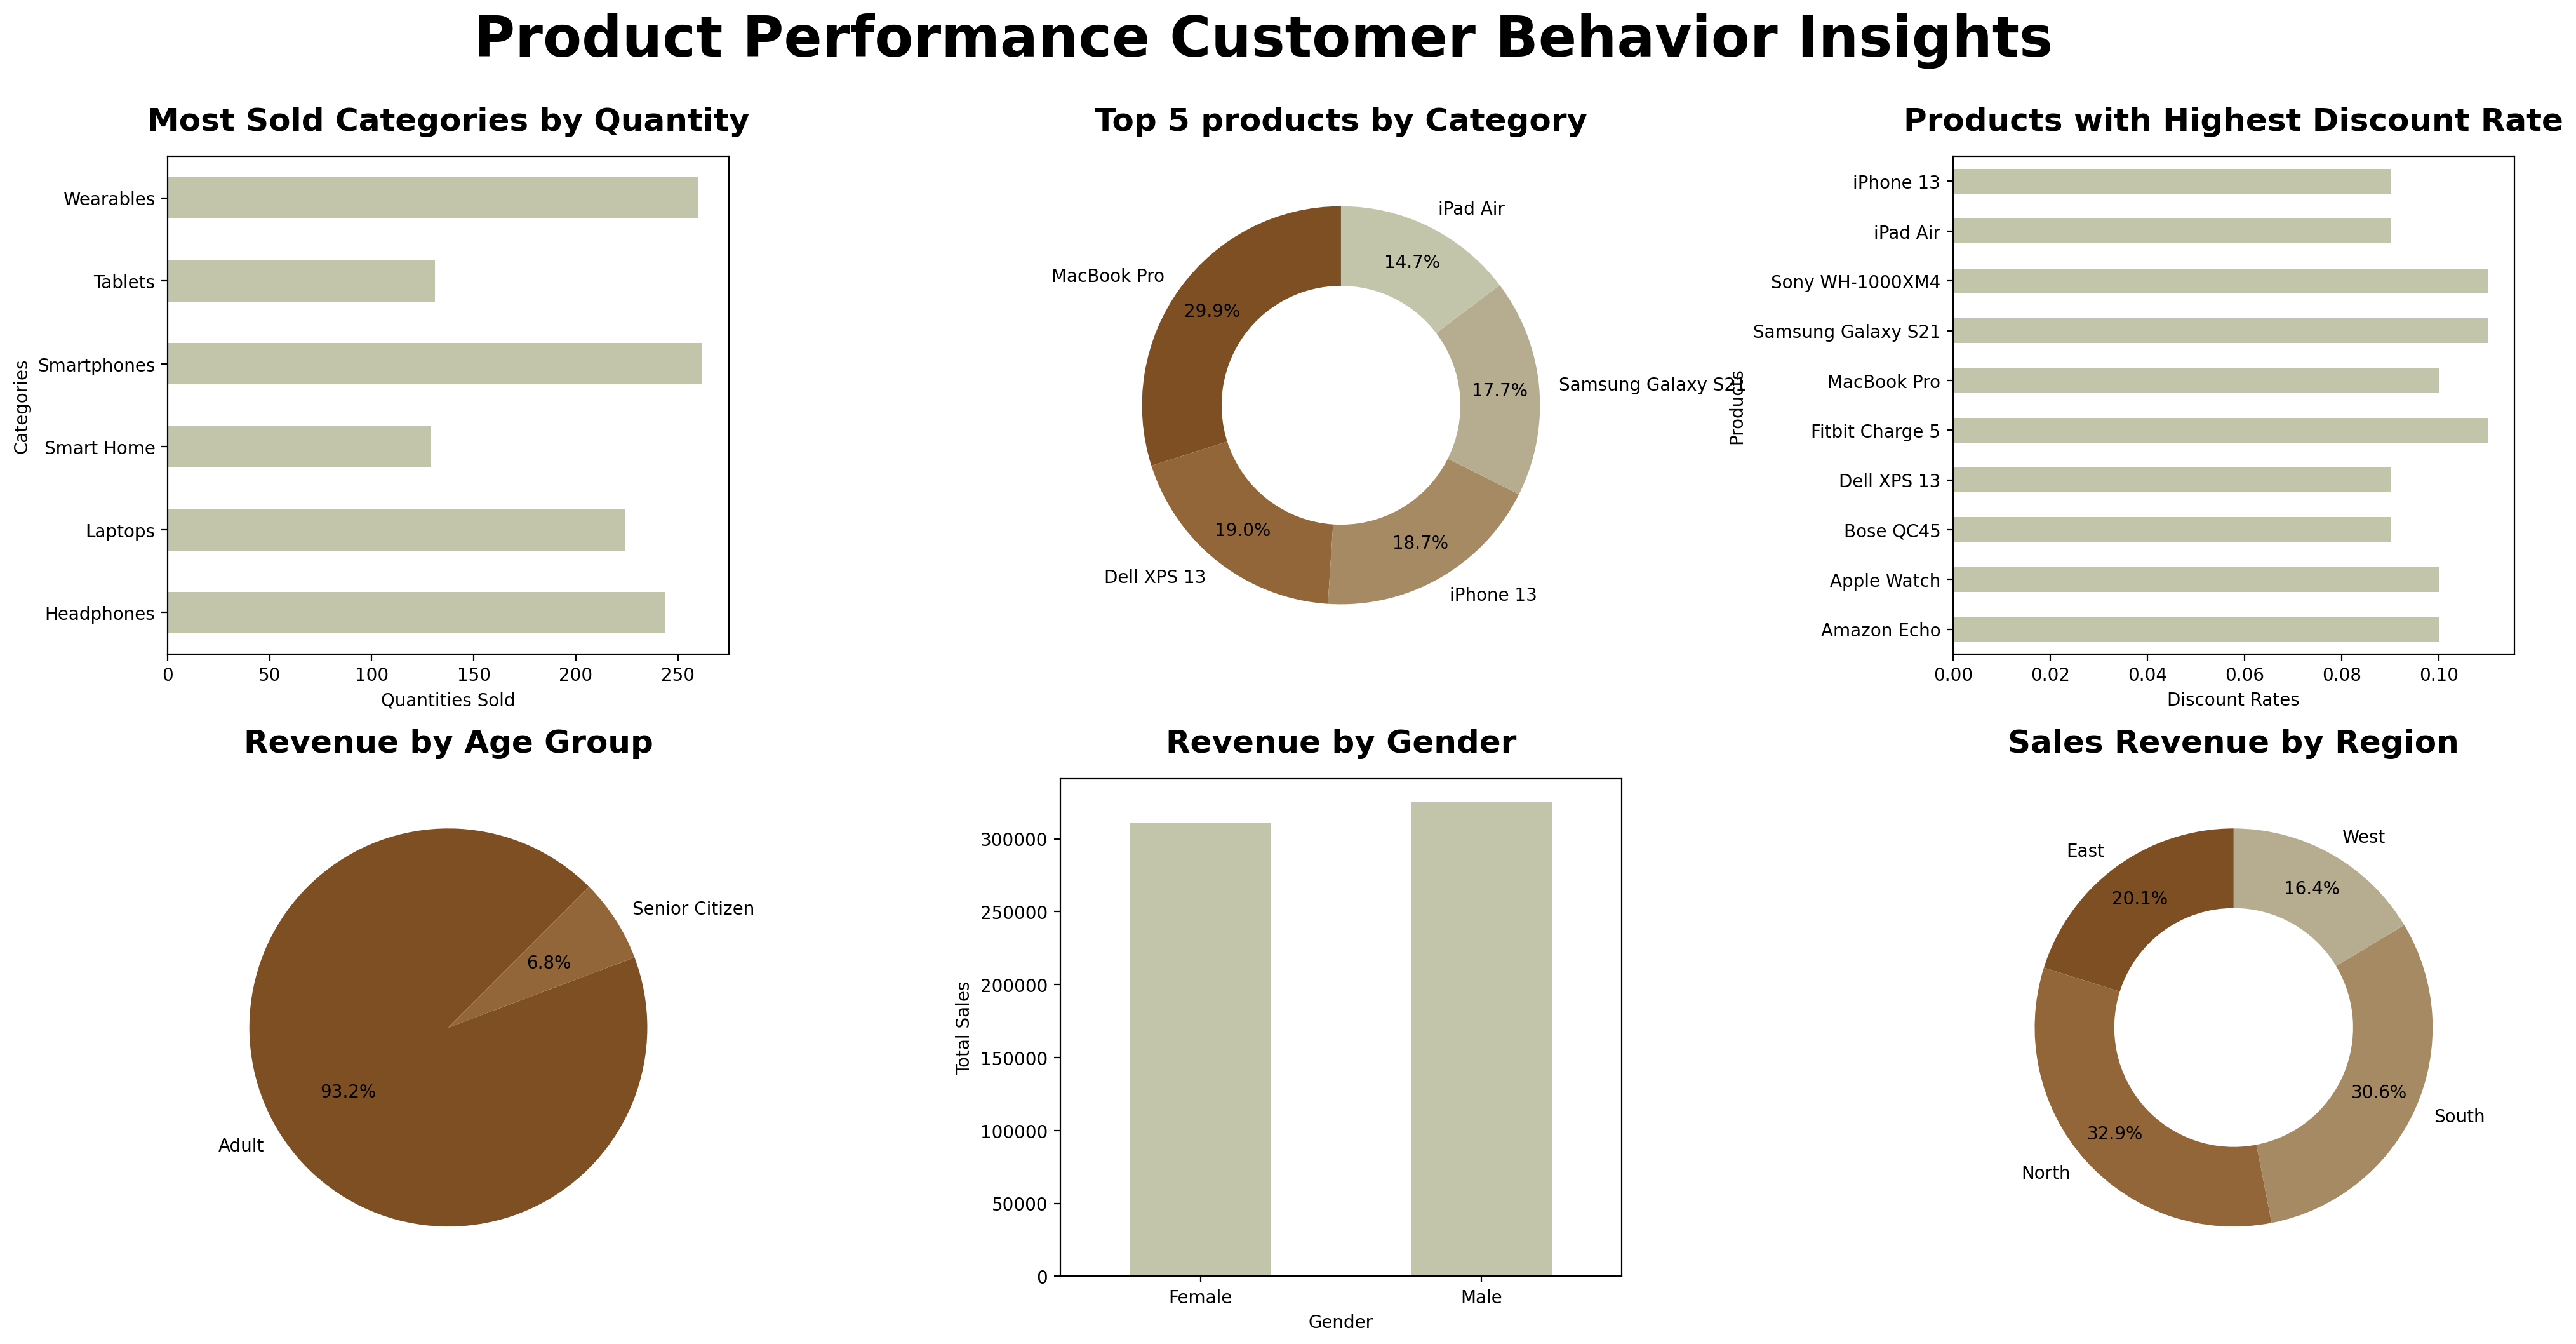

In [117]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

# Creating the first report layout
fig = plt.figure(figsize=(20, 15), dpi=200)
gs = GridSpec(3, 3, figure=fig)

plt.suptitle(
    'Product Performance Customer Behavior Insights',
    fontsize=32,
    fontweight='bold',
    y=1
)

# Plot 1: Most Sold Categories
ax1 = fig.add_subplot(gs[0, 0])
most_sold_categories.plot(kind='barh', color='#c2c5aa')
ax1.set_title('Most Sold Categories by Quantity', fontsize=18, weight='bold', pad=15)
ax1.set_xlabel('Quantities Sold')
ax1.set_ylabel('Categories')

# Plot 2: Top Products by Revenue
custom_colors = ['#7f4f24', '#936639', '#a68a64', '#b6ad90', '#c2c5aa']
ax2 = fig.add_subplot(gs[0, 1])
top_products.plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={"width": 0.4}, pctdistance=0.8, colors=custom_colors)
ax2.set_title('Top 5 products by Category', fontsize=18, weight='bold', pad=15)
ax2.set_ylabel('')

# Plot 3: Highest Discounted Products
ax3 = fig.add_subplot(gs[0, 2])
products_with_highest_disc_rate.plot(kind='barh', color='#c2c5aa')
ax3.set_title('Products with Highest Discount Rate', fontsize=18, weight='bold', pad=15)
ax3.set_ylabel('Products')
ax3.set_xlabel('Discount Rates')

# Plot 4: Revenue by Age Group
ax4 = fig.add_subplot(gs[1, 0])
revenue_by_age_group.plot(kind='pie', autopct='%1.1f%%', startangle=45, colors=custom_colors)
ax4.set_title('Revenue by Age Group', fontsize=18, weight='bold', pad=15)
ax4.set_ylabel('')

# Plot 5: Revenue by Gender
ax5 = fig.add_subplot(gs[1, 1])
revenue_by_gender.plot(kind='bar', color='#c2c5aa')
ax5.set_title('Revenue by Gender', fontsize=18, weight='bold', pad=15)
ax5.set_xlabel('Gender')
ax5.set_ylabel('Total Sales')
ax5.tick_params(axis='x', rotation=0)

# Plot 6: Revenue by Region
ax6 = fig.add_subplot(gs[1, 2])
revenue_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={"width": 0.4}, pctdistance=0.8, colors=custom_colors)
ax6.set_title('Sales Revenue by Region', fontsize=18, weight='bold', pad=15)
ax6.set_ylabel('')

plt.tight_layout()
plt.savefig('product_customer_insights_report_1.png')
plt.show()


# 📈 Report 2: Sales Trend Analysis & Seasonal Performance

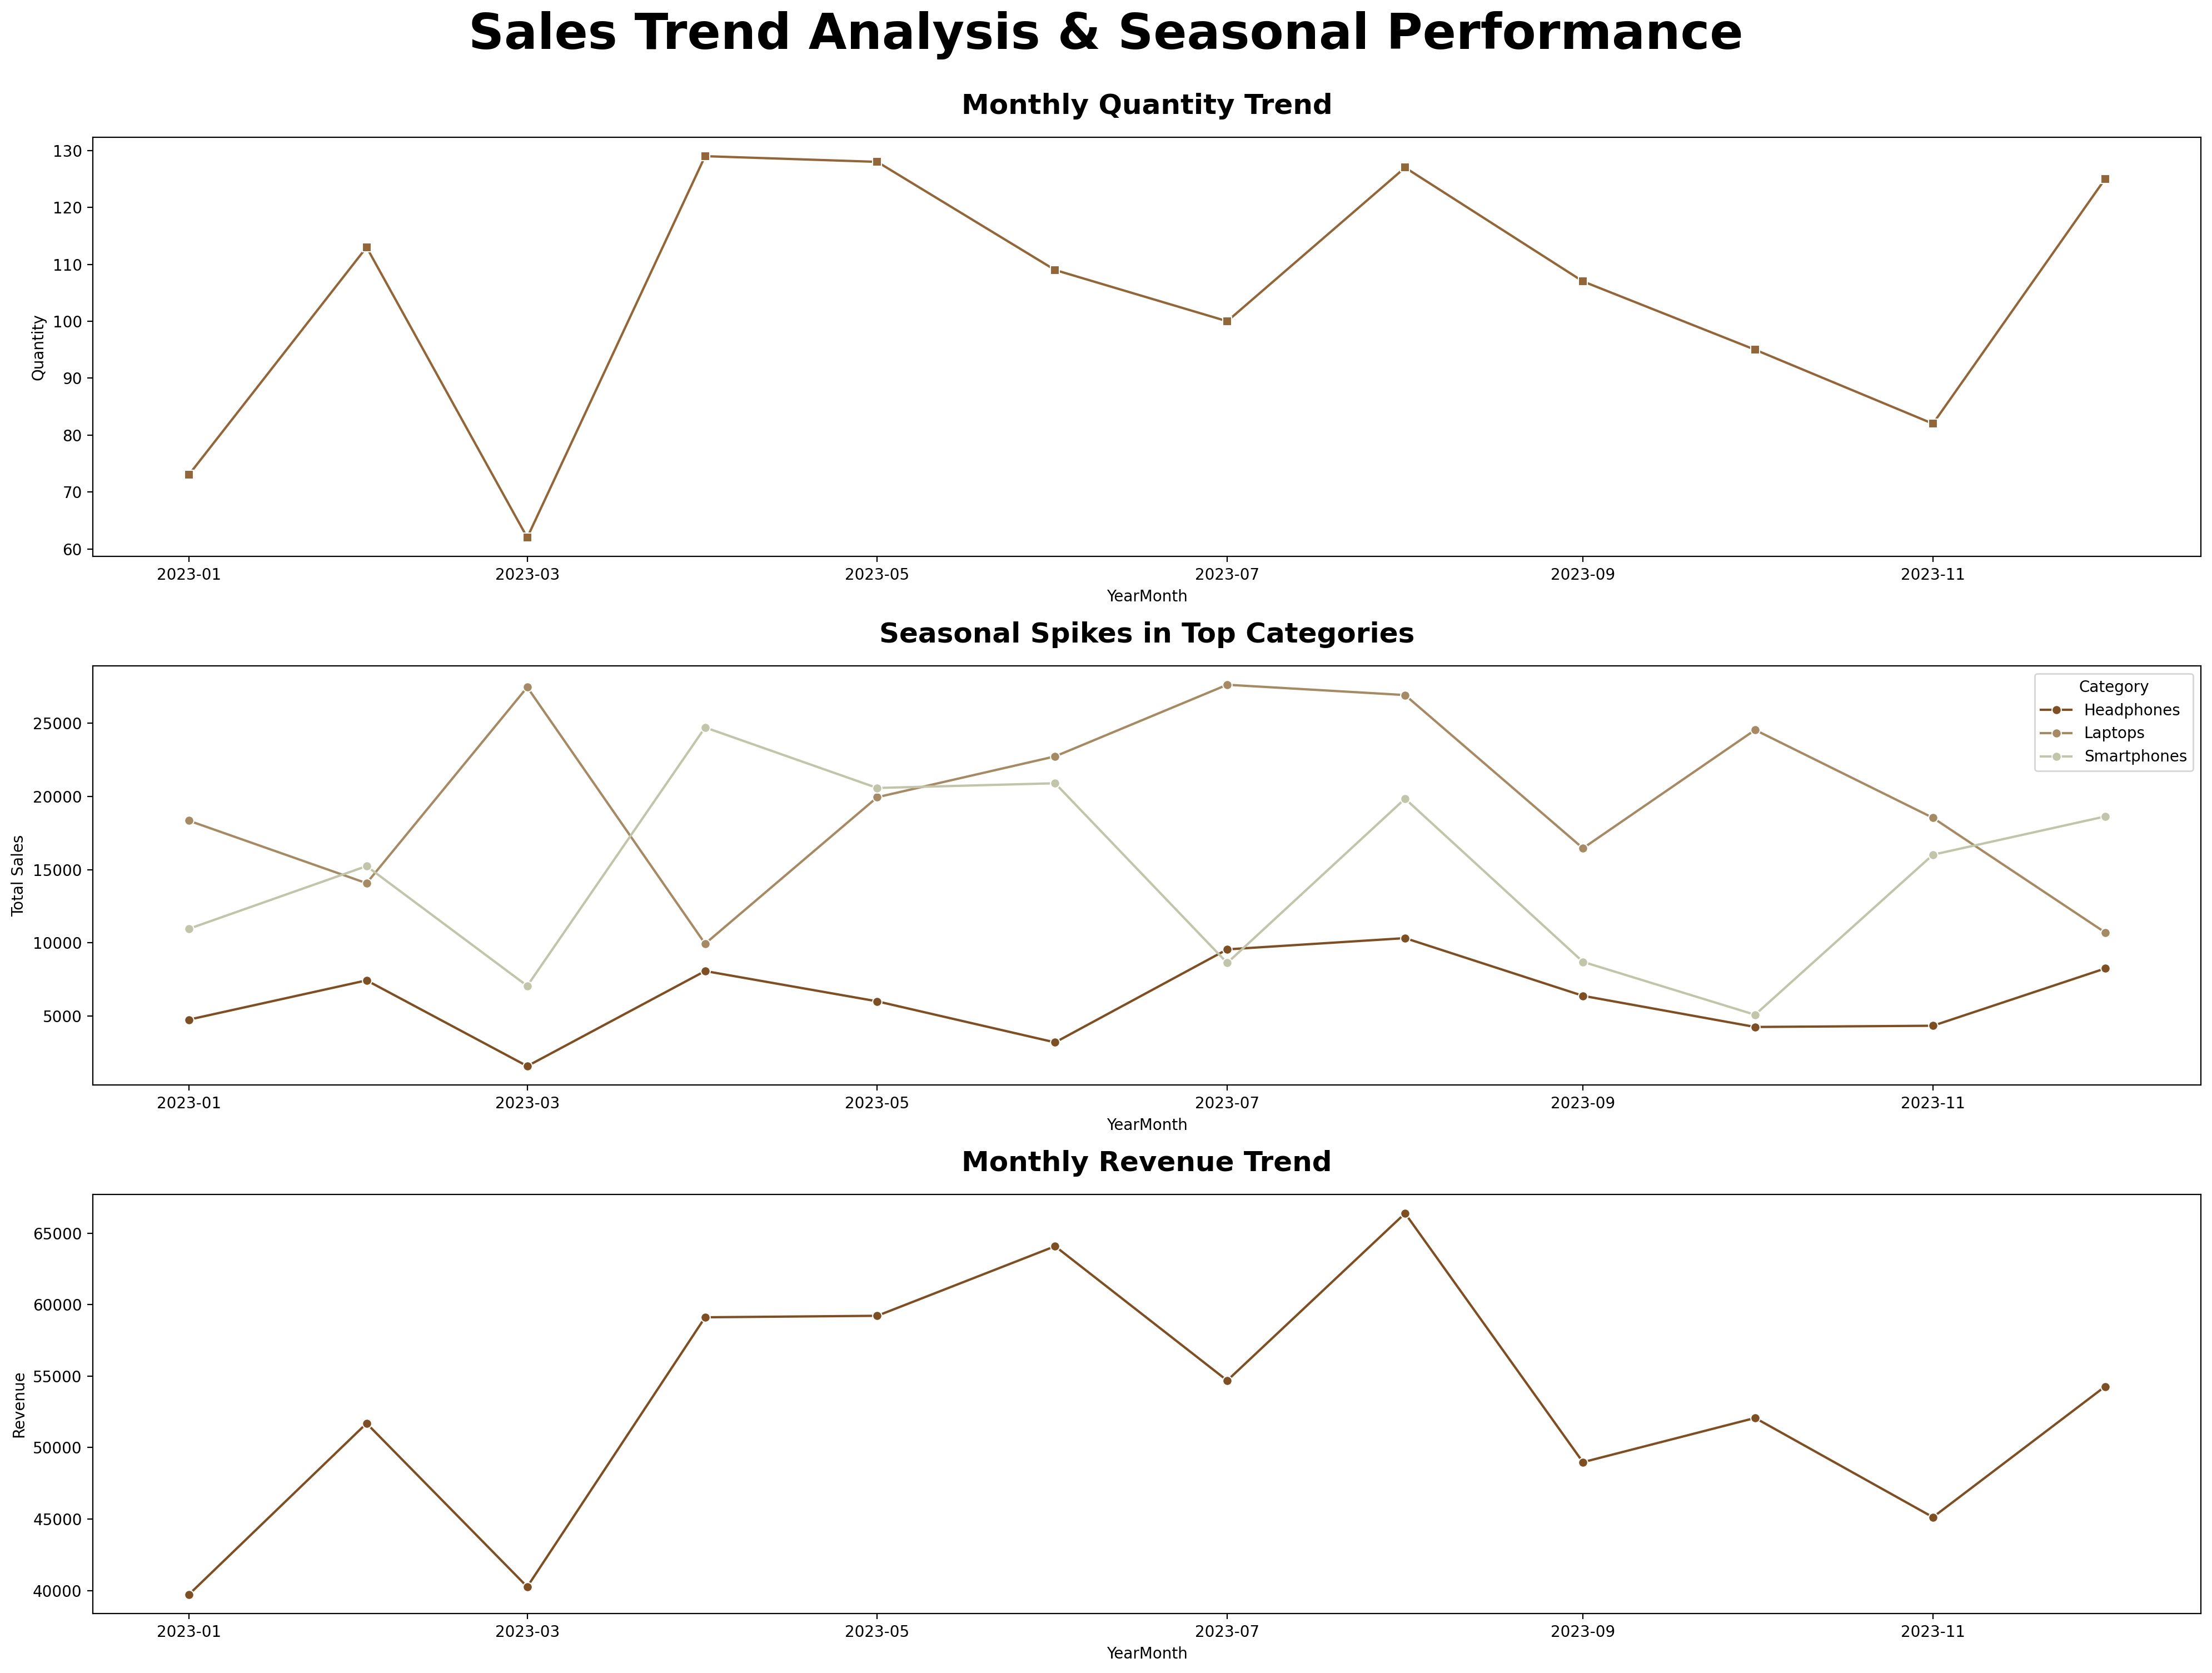

In [120]:
# Creating the second report layout
fig = plt.figure(figsize=(20, 15), dpi=200)
gs = GridSpec(3, 3, figure=fig)

plt.suptitle(
    'Sales Trend Analysis & Seasonal Performance',
    fontsize=32,
    fontweight='bold',
    y=1
)

# Plot 1: Monthly Quantity Trend
ax1 = fig.add_subplot(gs[0, :])
sns.lineplot(data=monthly_qty_trend, x='YearMonth', y='Quantity', marker='s', color='#936639')
ax1.set_title('Monthly Quantity Trend', fontsize=18, weight='bold', pad=15)
ax1.set_xlabel('YearMonth')
ax1.set_ylabel('Quantity')

# Plot 2: Seasonal Category Spikes
ax2 = fig.add_subplot(gs[1, :])
sns.lineplot(data=filtered_data, x='YearMonth', y='SalesAmount', hue='Category', marker='o', palette=custom_palettes)
ax2.set_title('Seasonal Spikes in Top Categories', fontsize=18, weight='bold', pad=15)
ax2.set_xlabel('YearMonth')
ax2.set_ylabel('Total Sales')

# Plot 3: Monthly Revenue Trend
ax3 = fig.add_subplot(gs[2, :])
sns.lineplot(data=monthly_revenue, x='YearMonth', y='SalesAmount', marker='o', color='#7f4f24')
ax3.set_title('Monthly Revenue Trend', fontsize=18, weight='bold', pad=15)
ax3.set_xlabel('YearMonth')
ax3.set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('sales_trend_seasonal_analysis_report_2.png')
plt.show()
